In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [3]:
df = pd.read_csv('train_data.csv')
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


# 1 - Exploratory Data Analysis

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [16]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
case_id,318438.0,159219.500000,91925.276848,1.0,79610.25,159219.5,238828.75,318438.0
Hospital_code,318438.0,18.318841,8.633755,1.0,11.00,19.0,26.00,32.0
City_Code_Hospital,318438.0,4.771717,3.102535,1.0,2.00,5.0,7.00,13.0
Available Extra Rooms in Hospital,318438.0,3.197627,1.168171,0.0,2.00,3.0,4.00,24.0
Bed Grade,318325.0,2.625807,0.873146,1.0,2.00,3.0,3.00,4.0
patientid,318438.0,65747.579472,37979.936440,1.0,32847.00,65724.5,98470.00,131624.0
City_Code_Patient,313906.0,7.251859,4.745266,1.0,4.00,8.0,8.00,38.0
Visitors with Patient,318438.0,3.284099,1.764061,0.0,2.00,3.0,4.00,32.0
Admission_Deposit,318438.0,4880.749392,1086.776254,1800.0,4186.00,4741.0,5409.00,11008.0


In [4]:
df.drop(['case_id', 'patientid'], axis=1, inplace=True)

In [18]:
df.groupby('Stay').count()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
Stay,,,,,,,,,,,,,,,
0-10,23604,23604,23604,23604,23604,23604,23604,23604,23602,23252,23604,23604,23604,23604,23604
11-20,78139,78139,78139,78139,78139,78139,78139,78139,78120,77114,78139,78139,78139,78139,78139
21-30,87491,87491,87491,87491,87491,87491,87491,87491,87454,86353,87491,87491,87491,87491,87491
31-40,55159,55159,55159,55159,55159,55159,55159,55159,55137,54334,55159,55159,55159,55159,55159
41-50,11743,11743,11743,11743,11743,11743,11743,11743,11735,11549,11743,11743,11743,11743,11743
51-60,35018,35018,35018,35018,35018,35018,35018,35018,35005,34476,35018,35018,35018,35018,35018
61-70,2744,2744,2744,2744,2744,2744,2744,2744,2740,2702,2744,2744,2744,2744,2744
71-80,10254,10254,10254,10254,10254,10254,10254,10254,10250,10100,10254,10254,10254,10254,10254
81-90,4838,4838,4838,4838,4838,4838,4838,4838,4837,4762,4838,4838,4838,4838,4838


In [19]:
stays = []
for i in range(len(df.Stay.unique())):
    stays.append(df.Stay.value_counts()[i])

Stays = pd.DataFrame((df.Stay.unique(), stays), index=['Days', 'Counts']).transpose()
Stays

,Days,Counts
0,0-10,87491
1,41-50,78139
2,31-40,55159
3,11-20,35018
4,51-60,23604
5,21-30,11743
6,71-80,10254
7,More than 100 Days,6683
8,81-90,4838
9,61-70,2765


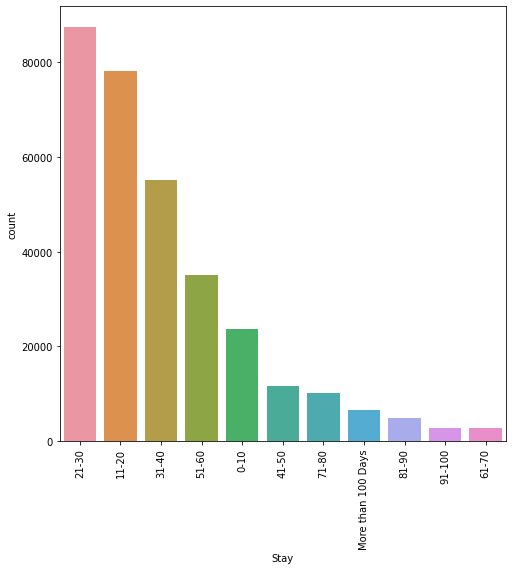

In [20]:
plt.figure(figsize=(8,8))
sns.countplot(data=df, x='Stay', order=df['Stay'].value_counts().index)
plt.xticks(rotation=90);

highly skewed, imbalanced

In [21]:
from utils import plot_count, plot_box

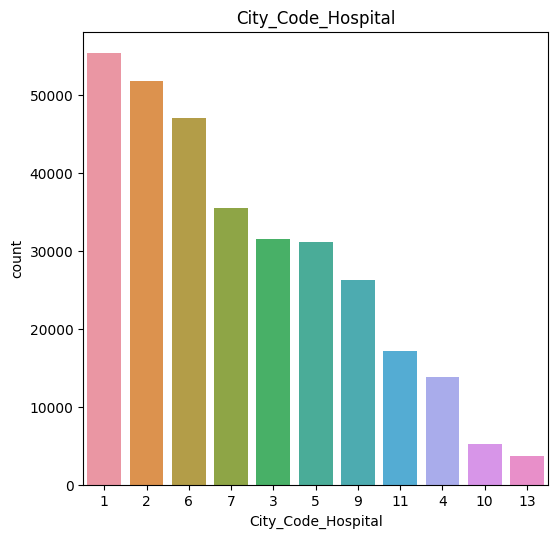

In [22]:
plot_count(df, 'City_Code_Hospital')

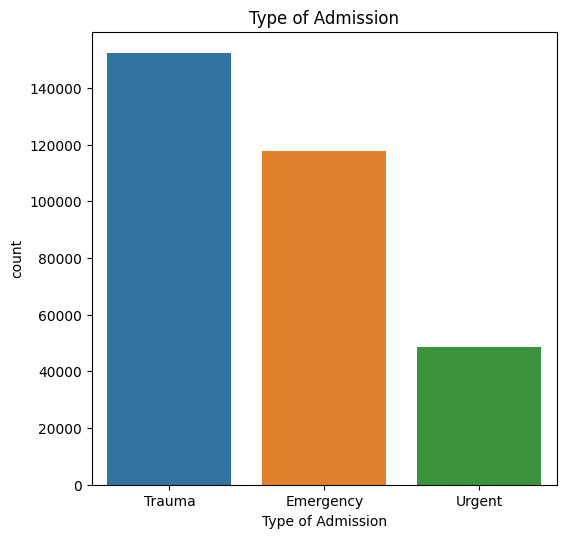

In [23]:
plot_count(df, 'Type of Admission')

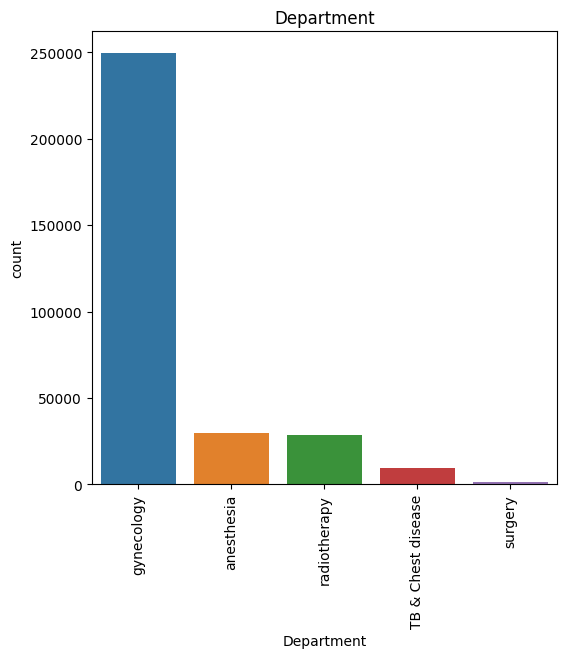

In [24]:
plot_count(df, 'Department', rotate=True)

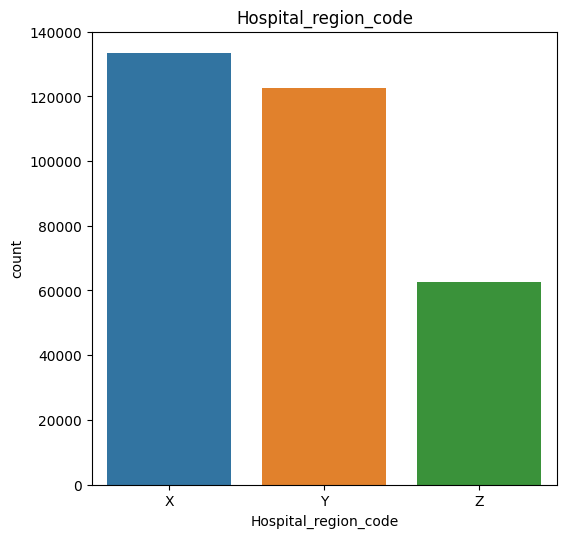

In [25]:
plot_count(df, 'Hospital_region_code')

<AxesSubplot:xlabel='City_Code_Patient', ylabel='Density'>

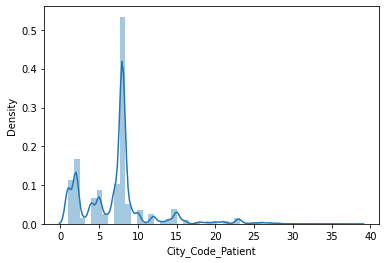

In [26]:
sns.distplot(df['City_Code_Patient'])

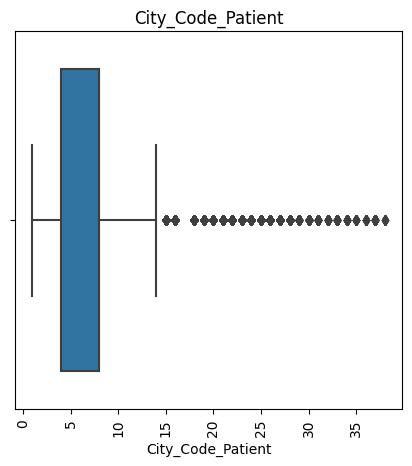

In [27]:
plot_box(df, 'City_Code_Patient')

Outliers

<AxesSubplot:xlabel='City_Code_Hospital', ylabel='Density'>

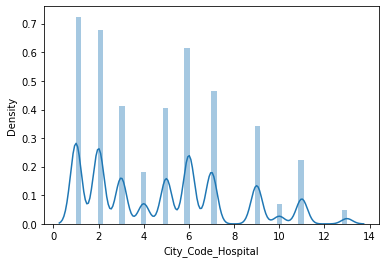

In [28]:
sns.distplot(df['City_Code_Hospital'])

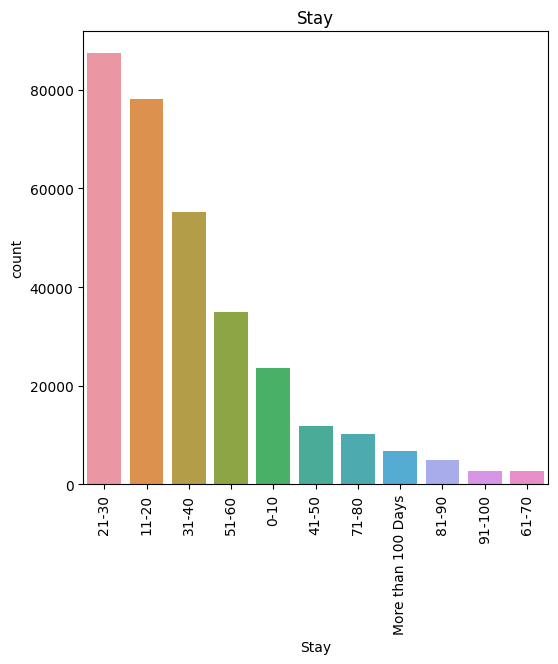

In [29]:
plot_count(df, 'Stay', rotate=True)

#### Correlation

<AxesSubplot:>

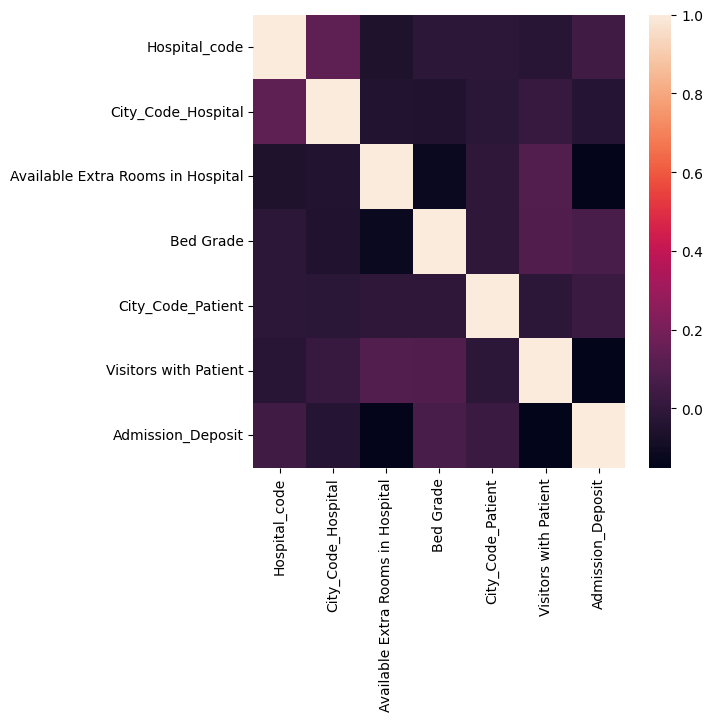

In [30]:
plt.figure(figsize=(6,6), dpi=100)
sns.heatmap(df.corr())

In [ ]:
plt.figure(figsize=(10,10), dpi=200)
sns.pairplot(df, hue='Stay')

KeyboardInterrupt: 

<Figure size 2000x2000 with 0 Axes>

## 2 - Data Preprocessing

### 2.1: Data Wrangling

#### 2.1.1: Missing Data

In [ ]:
df.isna().sum().sum()

In [ ]:
df=df.dropna()

In [ ]:
len(df[df.duplicated()])

In [5]:
from utils import find_missing, plot_missing

ImportError: cannot import name '_joblib_parallel_args' from 'sklearn.utils.fixes' (C:\Users\Youssef\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\fixes.py)

In [ ]:
sns.countplot(data=df, x='Bed Grade')

In [ ]:
missing = find_missing(df)
len(missing.axes[0])

In [ ]:
plot_missing(df)

In [ ]:
print(df['Bed Grade'].value_counts())

In [ ]:
_, mode = df.groupby('Hospital_code')['Bed Grade'].value_counts().idxmax()
mode

In [ ]:
#df['Bed Grade'] = df['Bed Grade'].fillna(2.0)

In [ ]:
plot_missing(df)

In [ ]:
df.dropna(axis=0, inplace=True)

In [ ]:
missing = plot_missing(df)

#### 2.1.2: Outliers

In [ ]:
from utils import outliers

In [ ]:
numeric_cols = df.select_dtypes(include=np.number)
correct_num = numeric_cols.drop(['Hospital_code', 'City_Code_Hospital', 'City_Code_Patient', 'Bed Grade'], axis=1)
correct_num.columns

In [ ]:
for c in correct_num.columns:
    plot_box(df, c)

In [ ]:
for c in correct_num.columns:
    df = outliers(df, c)
#     plot_box(df, c)

## 2.2: Normalization

Some of the categorical columns take numerical values, so we need to handle them before we normalize the numeric columns

In [ ]:
from sklearn import preprocessing

x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [ ]:
from utils import normalize

In [ ]:
train = normalize(df)

In [ ]:
train.head()

## 2.3: Categorical Encoding

In [ ]:
from utils import categorical_encoding

In [ ]:
df.columns

In [ ]:
#df.drop(['Hospital_region_code', 'Hospital_code','Ward_Facility_Code'], axis=1, inplace=True)
ordinal_features = df[['Severity of Illness', 'Type of Admission']]
label_features = df[['Hospital_type_code', 'City_Code_Hospital', 'City_Code_Patient', 'Department', 'Ward_Type']]

In [ ]:
def categorical_encoding(df):
    """
    A function to perform categorical encoding
    :param df: The dataframe
    :return: dataframe with encoded features and the features
    """
    from sklearn.preprocessing import OrdinalEncoder
    categorical_features = df.select_dtypes(exclude=np.number)
    encoder = OrdinalEncoder()
    df[categorical_features.columns] = encoder.fit_transform(categorical_features)
    return df, categorical_features


In [ ]:
train_scaled, _ = categorical_encoding(train)

In [ ]:
stay_dict = {'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6, '71-80': 7, '81-90': 8, '91-100': 9, 'More than 100 Days': 10}
train_scaled['Stay'] = train_scaled['Stay'].replace(stay_dict.keys(), stay_dict.values())

age_dict = {'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6, '71-80': 7, '81-90': 8, '91-100': 9}
train_scaled['Age'] = train_scaled['Age'].replace(age_dict.keys(), age_dict.values())

In [ ]:
train_scaled.head()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = train_scaled.drop(['Stay'], axis=1)
Y = train_scaled['Stay']
X_train, X_test_final, Y_train, Y_test_final = train_test_split(X, Y, test_size=0.15, random_state=42, stratify=Y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
train_splits = np.array_split(X_train, 30)
test_splits = np.array_split(Y_train, 30)
forest_model = RandomForestClassifier(warm_start=True, n_jobs=8)
for i in range(30):
    forest_model.n_estimators += 64
    forest_model.fit(train_splits[i], test_splits[i])
y_predVC = forest_model.predict(X_test_final)
print(accuracy_score(Y_test_final, y_predVC)*100)

In [ ]:
from utils import oversample

In [ ]:
x, y = oversample(X_train, Y_train, "smote")

In [ ]:
y.shape

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42, stratify=y)

In [ ]:
data_splits = np.array_split(train_scaled, 30)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time

forest_model = RandomForestClassifier(warm_start=True, n_jobs=9)
t1 = time.perf_counter()

forest_model.fit(x_train, y_train)

forest_preds = forest_model.predict(X_test_final)
t2 = time.perf_counter()
print(accuracy_score(Y_test_final, forest_preds)*100)
print('time', t2-t1)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=10000).fit(x_train, y_train)
# clf.predict(X[:2, :])
# clf.predict_proba(X[:2, :])
# clf.score(X, y)

In [ ]:
print (f'Accuracy - : {clf.score(X_test_final,Y_test_final):.3f}')

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
logModel = LogisticRegression(penalty='l2',solver='newton-cg',max_iter=1000)
t1 = time.perf_counter()
# param_grid = [    
#     {
# #     'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
# #     'C' : np.logspace(-4, 4, 10),
# #     'solver' : ['lbfgs','newton-cg','sag','saga'],
#     'max_iter' : [1000,2500, 5000]
#     }
# ]
# logesticReg = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
# best_clf = logesticReg.fit(x,y)
# best_clf.best_estimator_
logModel.fit(x,y)
t2 = time.perf_counter()
print('time', t2-t1)

C:\Users\Youssef\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Youssef\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


LogisticRegression(max_iter=1000, solver='newton-cg')

In [32]:
print (f'Accuracy - : {logModel.score(X_test_final,Y_test_final):.3f}')

Accuracy - : 0.216


In [34]:
import time

logModel = LogisticRegression(penalty='l2',solver='lbfgs',max_iter=1000)
t1 = time.perf_counter()
# param_grid = [    
#     {
# #     'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
# #     'C' : np.logspace(-4, 4, 10),
# #     'solver' : ['lbfgs','newton-cg','sag','saga'],
#     'max_iter' : [1000,2500, 5000]
#     }
# ]
# logesticReg = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
# best_clf = logesticReg.fit(x,y)
# best_clf.best_estimator_
logModel.fit(x,y)
t2 = time.perf_counter()
print('time', t2-t1)

time 175.54432450000058


C:\Users\Youssef\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
print (f'Accuracy - : {logModel.score(X_test_final,Y_test_final):.3f}')

Accuracy - : 0.202


In [36]:
logModel = LogisticRegression(penalty='none',solver='lbfgs',max_iter=1000)
t1 = time.perf_counter()
# param_grid = [    
#     {
# #     'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
# #     'C' : np.logspace(-4, 4, 10),
# #     'solver' : ['lbfgs','newton-cg','sag','saga'],
#     'max_iter' : [1000,2500, 5000]
#     }
# ]
# logesticReg = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
# best_clf = logesticReg.fit(x,y)
# best_clf.best_estimator_
logModel.fit(x,y)
t2 = time.perf_counter()
print('time', t2-t1)
print (f'Accuracy - : {logModel.score(X_test_final,Y_test_final):.3f}')

time 158.18172929999946
Accuracy - : 0.214


C:\Users\Youssef\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
logModel = LogisticRegression(penalty='none',solver='newton-cg',max_iter=1000)
t1 = time.perf_counter()
# param_grid = [    
#     {
# #     'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
# #     'C' : np.logspace(-4, 4, 10),
# #     'solver' : ['lbfgs','newton-cg','sag','saga'],
#     'max_iter' : [1000,2500, 5000]
#     }
# ]
# logesticReg = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
# best_clf = logesticReg.fit(x,y)
# best_clf.best_estimator_
logModel.fit(x,y)
t2 = time.perf_counter()
print('time', t2-t1)
print (f'Accuracy - : {logModel.score(X_test_final,Y_test_final):.3f}')

time 735.6415006999996
Accuracy - : 0.216


In [38]:
logModel = LogisticRegression(penalty='l1',solver='liblinear',max_iter=1000)
t1 = time.perf_counter()
# param_grid = [    
#     {
# #     'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
# #     'C' : np.logspace(-4, 4, 10),
# #     'solver' : ['lbfgs','newton-cg','sag','saga'],
#     'max_iter' : [1000,2500, 5000]
#     }
# ]
# logesticReg = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
# best_clf = logesticReg.fit(x,y)
# best_clf.best_estimator_
logModel.fit(x,y)
t2 = time.perf_counter()
print('time', t2-t1)
print (f'Accuracy - : {logModel.score(X_test_final,Y_test_final):.3f}')

time 133.27864709999994
Accuracy - : 0.220


In [39]:
logModel = LogisticRegression(penalty='l2',solver='liblinear',max_iter=1000)
t1 = time.perf_counter()
# param_grid = [    
#     {
# #     'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
# #     'C' : np.logspace(-4, 4, 10),
# #     'solver' : ['lbfgs','newton-cg','sag','saga'],
#     'max_iter' : [1000,2500, 5000]
#     }
# ]
# logesticReg = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
# best_clf = logesticReg.fit(x,y)
# best_clf.best_estimator_
logModel.fit(x,y)
t2 = time.perf_counter()
print('time', t2-t1)
print (f'Accuracy - : {logModel.score(X_test_final,Y_test_final):.3f}')

time 28.107992999999624
Accuracy - : 0.211


In [40]:
logModel = LogisticRegression(penalty='l2',solver='sag',max_iter=1000)
t1 = time.perf_counter()
# param_grid = [    
#     {
# #     'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
# #     'C' : np.logspace(-4, 4, 10),
# #     'solver' : ['lbfgs','newton-cg','sag','saga'],
#     'max_iter' : [1000,2500, 5000]
#     }
# ]
# logesticReg = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
# best_clf = logesticReg.fit(x,y)
# best_clf.best_estimator_
logModel.fit(x,y)
t2 = time.perf_counter()
print('time', t2-t1)
print (f'Accuracy - : {logModel.score(X_test_final,Y_test_final):.3f}')

time 595.7522016000003
Accuracy - : 0.210


C:\Users\Youssef\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [41]:
logModel = LogisticRegression(penalty='none',solver='sag',max_iter=1000)
t1 = time.perf_counter()
# param_grid = [    
#     {
# #     'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
# #     'C' : np.logspace(-4, 4, 10),
# #     'solver' : ['lbfgs','newton-cg','sag','saga'],
#     'max_iter' : [1000,2500, 5000]
#     }
# ]
# logesticReg = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
# best_clf = logesticReg.fit(x,y)
# best_clf.best_estimator_
logModel.fit(x,y)
t2 = time.perf_counter()
print('time', t2-t1)
print (f'Accuracy - : {logModel.score(X_test_final,Y_test_final):.3f}')

time 596.4021943000007
Accuracy - : 0.210


C:\Users\Youssef\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [42]:
logModel = LogisticRegression(penalty='l2',solver='lbfgs',max_iter=1000)
t1 = time.perf_counter()
# param_grid = [    
#     {
# #     'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
# #     'C' : np.logspace(-4, 4, 10),
# #     'solver' : ['lbfgs','newton-cg','sag','saga'],
#     'max_iter' : [1000,2500, 5000]
#     }
# ]
# logesticReg = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
# best_clf = logesticReg.fit(x,y)
# best_clf.best_estimator_
logModel.fit(x,y)
t2 = time.perf_counter()
print('time', t2-t1)
print (f'Accuracy - : {logModel.score(X_test_final,Y_test_final):.3f}')

time 160.844969400001
Accuracy - : 0.202


C:\Users\Youssef\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
logModel = LogisticRegression(penalty='none',solver='lbfgs',max_iter=1000)
t1 = time.perf_counter()
# param_grid = [    
#     {
# #     'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
# #     'C' : np.logspace(-4, 4, 10),
# #     'solver' : ['lbfgs','newton-cg','sag','saga'],
#     'max_iter' : [1000,2500, 5000]
#     }
# ]
# logesticReg = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
# best_clf = logesticReg.fit(x,y)
# best_clf.best_estimator_
logModel.fit(x,y)
t2 = time.perf_counter()
print('time', t2-t1)
print (f'Accuracy - : {logModel.score(X_test_final,Y_test_final):.3f}')

time 151.74583819999862
Accuracy - : 0.214


C:\Users\Youssef\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [142]:
# ##### SGD Classifier
from sklearn import linear_model
SGDClf = linear_model.SGDClassifier(max_iter = 10000, tol=1e-3,penalty = "elasticnet")
SGDClf.fit(x, y)

SGDClassifier(max_iter=10000, penalty='elasticnet')

In [143]:
print (f'Accuracy - : {SGDClf.score(X_test_final,Y_test_final):.3f}')

Accuracy - : 0.123


In [ ]:
from sklearn.linear_model import LogisticRegressionCV
import time

In [ ]:
model = LogisticRegressionCV(max_iter=10000, verbose=2, n_jobs=-1, multi_class='multinomial')
t1 = time.perf_counter()
model.fit(x_train, y_train)
preds_logistic = model.predict(x_test)
t2 = time.perf_counter()
print('time: ', t2-t1)
print(accuracy_score(y_test, preds_logistic)*100)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [ ]:
XGmodel = GradientBoostingClassifier()
param_grid = {'n_estimators':[64, 128, 256, 512],
              'learning_rate':[0.001, 0.01, 0.05,0.1, 0.2],
              'max_depth':[3, 4, 5]}

grid = GridSearchCV(XGmodel, param_grid)
grid.fit(xtrain, y_train)
xg_preds = grid.predict(x_test)
print(classification_report(y_test, xg_preds))

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada_model = AdaBoostClassifier()
grid_param = {
    'n_estimators':[64, 128, 256, 512],
    'learning_rate':[0.001, 0.01, 0.05,0.1, 0.2]
}

grid = GridSearchCV(ada_model, grid_param, n_jobs=-1, verbose=1)
grid.fit(x_train, y_train)
ada_preds = grid.predict(x_test)
print(accuracy_score(y_test, ada_preds))

In [ ]:
def plot_error(model, param):
    error_rate_test, error_rate_train = [], []
    for n in range(1, 100):
        m = model(param=n)
        m.fit(x_train, y_train)
        test_preds = m.predict(x_test)
        train_preds = m.predict(x_train)
        error_rate_test.append(1-accuracy_score(y_test, test_preds))
        error_rate_train.append(1-accuracy_score(y_test, train_preds))
    plt.plot(range(1,100), error_rate)

In [ ]:
error_rate = []
for n in range(1, len(X.columns)):
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    error_rate.append(1-accuracy_score(y_test, preds))



In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot

In [ ]:
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k=15)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    pyplot.figure(figsize=(8,8), dpi=200)
    
    feat_norm = fs.scores_ /sum(fs.scores_)
    
    for i in range(len(fs.scores_)):
        print('Feature %d: %f' % (i, fs.scores_[i]))
    
    pyplot.bar([X.columns[i]  for i in range(len(fs.scores_))], feat_norm)
    
    pyplot.xticks(rotation=90)
    pyplot.show()
    pyplot.savefig('plot_chi.png')
    #sns.barplot(x=features, y=fs.scores_,data=df)
    
    return X_train_fs, X_test_fs, fs

    
select_features(X_train, y_train, X_test)


In [ ]:
print(df.columns)